<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-CNN/blob/main/Tugas_ML_CNN_SVM_AdhitDanielRian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image
from random import shuffle
import numpy as np
from google.colab import drive
import zipfile
from shutil import copy

In [ ]:
# Download dataset flowers
!pip install --upgrade gdown
!gdown --id 1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD -O flowers.zip
!ls -lh

Requirement already up-to-date: gdown in /usr/local/lib/python3.7/dist-packages (3.13.0)
Downloading...
From: https://drive.google.com/uc?id=1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD
To: /content/flowers.zip
472MB [00:03, 139MB/s]
total 450M
-rw-r--r-- 1 root root 450M Jun  5 06:42 flowers.zip
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data


In [ ]:
FILE_PATH = '/content/flowers.zip'
EXTRACTED_PATH = '/tmp/flowers/'
PROCESSED_PATH = '/tmp/processed/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# View folder structure
!apt install tree -y
!tree -d -L 2 /tmp/flowers/

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData(grayscale=True):
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(PROCESSED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                if grayscale:
                  new_img = new_img.convert('L')
                new_img.save(PROCESSED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1
loadData()

shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/tmp/flowers/
├── daisy
├── dandelion
├── flowers
│   ├── daisy
│   ├── dandelion
│   ├── rose
│   ├── sunflower
│   └── tulip
├── rose
├── sunflower
└── tulip

11 directories


In [ ]:
def displayImages(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []
  if final:
      folder = FINAL_PATH
  else:
      folder = PROCESSED_PATH
  subdirs = os.listdir(folder)
  print(subdirs)
  for subdir in subdirs:
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
            #images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # if final:
    #     plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # else:
    #     plt.imshow(image)

['dandelion', 'sunflower', 'rose']
5
['dandelion', 'sunflower', 'rose']
5


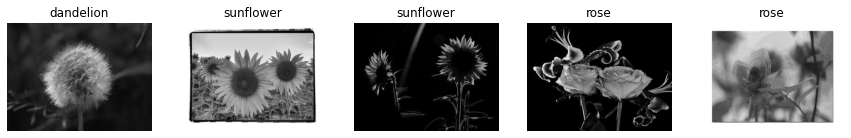

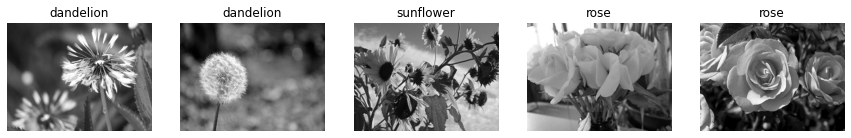

In [ ]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

In [ ]:
train_rose_dir = '/tmp/final/train/rose/'
os.makedirs(os.path.dirname(train_rose_dir), exist_ok=True)
train_sunflower_dir = '/tmp/final/train/sunflower/'
os.makedirs(os.path.dirname(train_sunflower_dir), exist_ok=True)
train_dandelion_dir = '/tmp/final/train/dandelion/'
os.makedirs(os.path.dirname(train_dandelion_dir), exist_ok=True)

test_rose_dir = '/tmp/final/test/rose/'
os.makedirs(os.path.dirname(test_rose_dir), exist_ok=True)
test_sunflower_dir = '/tmp/final/test/sunflower/'
os.makedirs(os.path.dirname(test_sunflower_dir), exist_ok=True)
test_dandelion_dir = '/tmp/final/test/dandelion/'
os.makedirs(os.path.dirname(test_dandelion_dir), exist_ok=True)

for item, folder in TRAIN_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_dandelion_dir, item)
        copy(old_path, new_path)

for item, folder in TEST_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_dandelion_dir, item)
        copy(old_path, new_path)